12 different plots for each ride, in the plot will have the 4 different day types

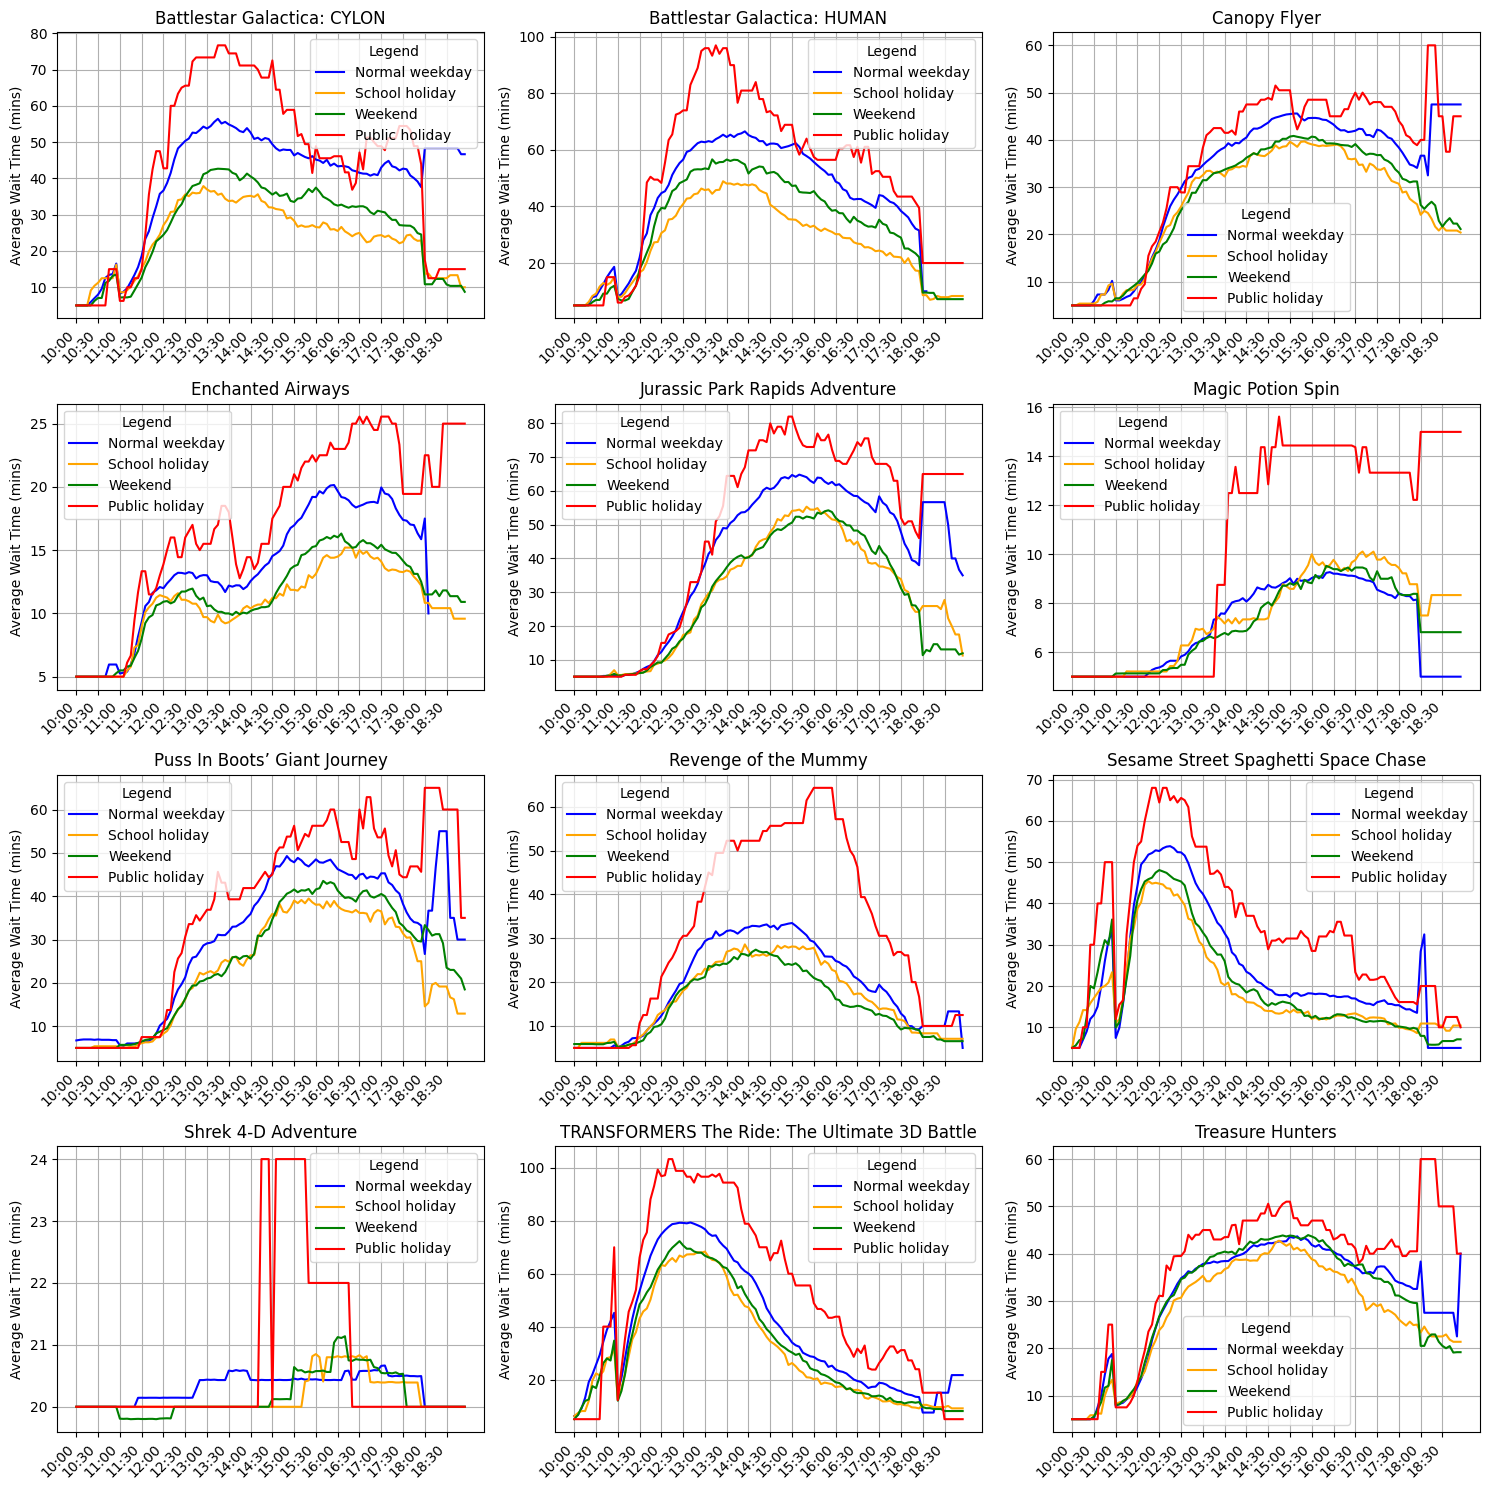

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset
file_path = '../data/merged_output.csv'
df = pd.read_csv(file_path)

# Convert 'Date/Time' column to datetime format, handling multiple formats
def convert_datetime(value):
    try:
        return pd.to_datetime(value, format='%Y-%m-%d %H:%M:%S', errors='raise')
    except ValueError:
        try:
            return pd.to_datetime(value, format='%d/%m/%y %H:%M', errors='raise')
        except ValueError:
            return pd.NaT

# Apply conversion function
df['Date/Time'] = df['Date/Time'].apply(convert_datetime)

# Extract the hour and minute from the Date/Time column
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

# Create a 'time' column formatted as 'HH:MM'
df['time'] = df['hour'].astype(int).astype(str).str.zfill(2) + ':' + df['minute'].astype(int).astype(str).str.zfill(2)

# Filter data for the time range between 10:00 AM and 7:00 PM
df_filtered = df[(df['hour'] >= 10) & (df['hour'] <= 19)]

# Calculate the average wait time for each Ride, DayType, and time interval
df_avg_wait = df_filtered.groupby(['Ride', 'DayType', 'time'])['Wait Time'].mean().reset_index()

# Rename the 'Wait Time' column to 'avg_wait_time'
df_avg_wait = df_avg_wait.rename(columns={'Wait Time': 'avg_wait_time'})

# Map DayType to their respective names
day_type_map = {
    0: 'Normal weekday',
    1: 'School holiday',
    2: 'Weekend',
    3: 'Public holiday'
}

# Replace DayType values with names
df_avg_wait['DayType'] = df_avg_wait['DayType'].map(day_type_map)

# Define color mapping for each DayType
color_map = {
    'Normal weekday': 'blue',
    'School holiday': 'orange',
    'Weekend': 'green',
    'Public holiday': 'red'
}

# Create a plot for each Ride
rides = df_avg_wait['Ride'].unique()

# Set up the plotting
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()

# Plot each ride
for idx, ride in enumerate(rides):
    ax = axes[idx]
    ride_data = df_avg_wait[df_avg_wait['Ride'] == ride]
    for day_type in ride_data['DayType'].unique():
        day_data = ride_data[ride_data['DayType'] == day_type]
        color = color_map.get(day_type, 'black')  # Use black as a fallback color
        if not day_data.empty:
            ax.plot(day_data['time'], day_data['avg_wait_time'], label=day_type, color=color)
    ax.set_title(ride)
    ax.set_ylabel('Average Wait Time (mins)')
    ax.legend(title='Legend')
    ax.grid(True)
    half_hour_intervals = day_data['time'][::6]
    ax.set_xticks(half_hour_intervals)
    ax.set_xticklabels(half_hour_intervals, rotation=45, ha='right')

plt.tight_layout()
plt.show()


4 different plots based of day type, showing all 12 rides in each

C:\Users\knnth\AppData\Local\Temp\ipykernel_37952\1969996148.py:131: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Apply tight layout to fit everything


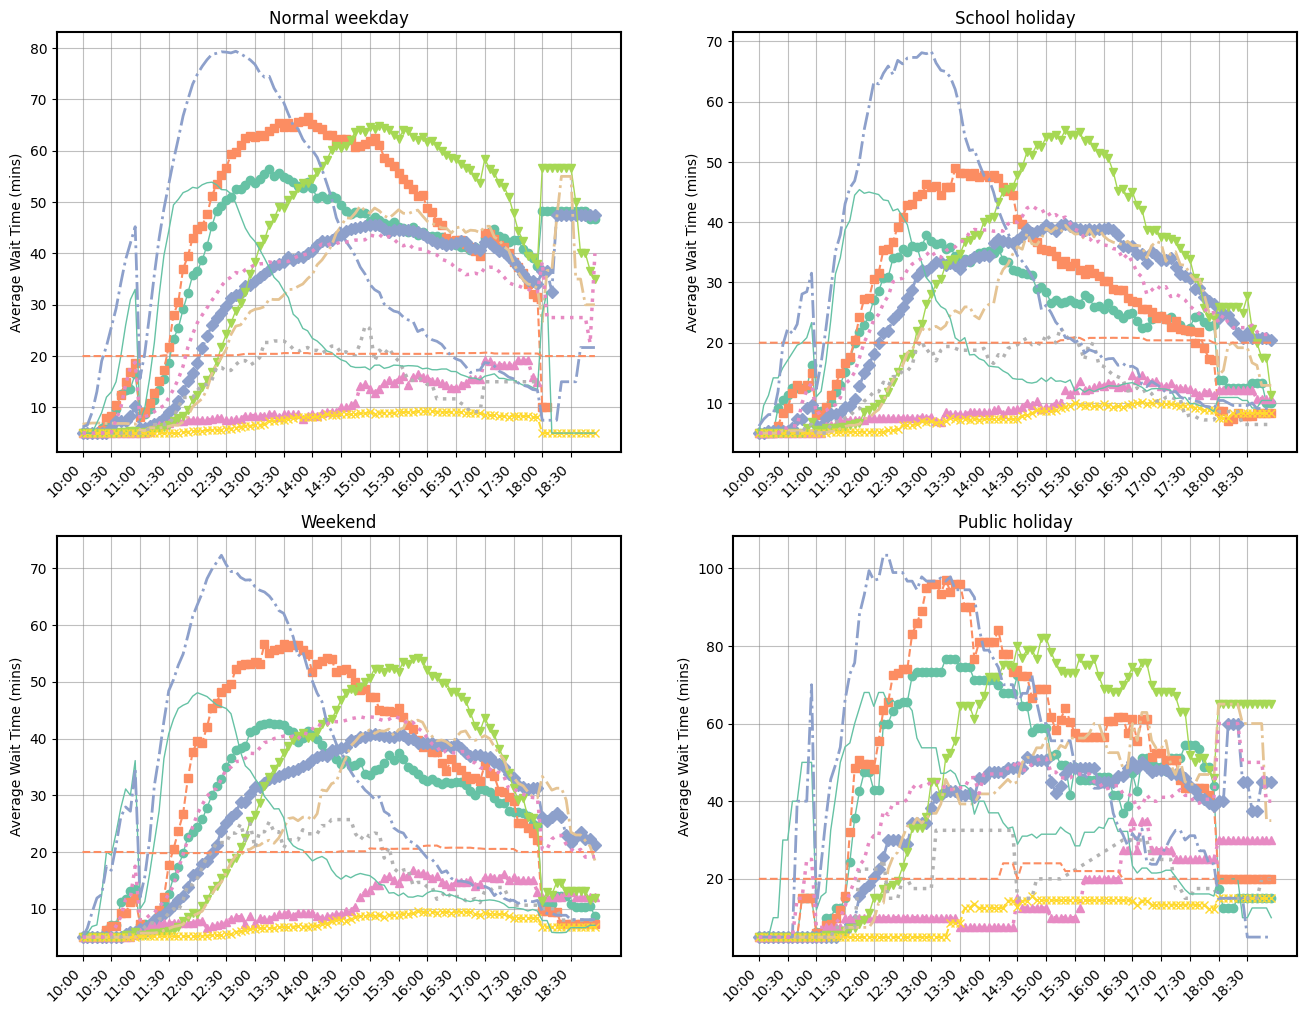

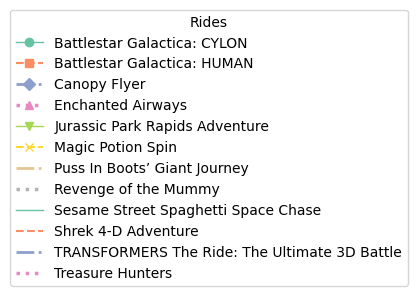

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '../data/merged_output.csv'
df = pd.read_csv(file_path)

# Remove the unwanted column
df = df.drop(columns=['<!doctype html>'], errors='ignore')

# Step 1: Detect rows with the 'DD/MM/YY HH:MM' format
mask_dd_mm_yy = df['Date/Time'].str.contains(r'\d{2}/\d{2}/\d{2} \d{2}:\d{2}', na=False)

# Step 2: Convert 'DD/MM/YY HH:MM' to 'YYYY-MM-DD HH:MM:SS'
df.loc[mask_dd_mm_yy, 'Date/Time'] = pd.to_datetime(df.loc[mask_dd_mm_yy, 'Date/Time'], format='%d/%m/%y %H:%M').dt.strftime('%Y-%m-%d %H:%M:%S')

# Step 3: Convert the entire 'Date/Time' column to datetime
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

# Drop rows where 'Date/Time' couldn't be parsed (NaT values)
df = df.dropna(subset=['Date/Time'])

# Extract the hour and minute from the Date/Time column
df['hour'] = df['Date/Time'].dt.hour
df['minute'] = df['Date/Time'].dt.minute

# Create a 'time' column formatted as 'HH:MM'
df['time'] = df['hour'].astype(int).astype(str).str.zfill(2) + ':' + df['minute'].astype(int).astype(str).str.zfill(2)

# Filter data for the time range between 10:00 AM and 7:00 PM
df_filtered = df[(df['hour'] >= 10) & (df['hour'] <= 19)]

# Calculate the average wait time for each Ride, DayType, and time interval
df_avg_wait = df_filtered.groupby(['Ride', 'DayType', 'time'])['Wait Time'].mean().reset_index()

# Rename the 'Wait Time' column to 'avg_wait_time'
df_avg_wait = df_avg_wait.rename(columns={'Wait Time': 'avg_wait_time'})

# Map DayType to their respective names
day_type_map = {
    0: 'Normal weekday',
    1: 'School holiday',
    2: 'Weekend',
    3: 'Public holiday'
}

# Replace DayType values with names
df_avg_wait['DayType'] = df_avg_wait['DayType'].map(day_type_map)

# Set the plot style to have a white background, grey grid, and black outline
plt.rcParams['axes.facecolor'] = 'white'  # White background for axes
plt.rcParams['grid.color'] = 'grey'  # Grey grid lines
plt.rcParams['axes.edgecolor'] = 'black'  # Black outline around axes
plt.rcParams['axes.linewidth'] = 1.5  # Black outline thickness
plt.rcParams['grid.alpha'] = 0.5  # Grid line transparency

# Custom color palette for better distinction
colors = sns.color_palette("Set2", 12)  # 12 distinct colors

# Create a plot for each DayType
day_types = df_avg_wait['DayType'].unique()

# Set up the plotting with the requested styling
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create markers and line styles for better distinction
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', 'D', '^', 'v', 'x']
line_widths = [1, 1.5, 2, 2.5]

# To store the legend handles and labels
handles = []
labels = []

# Plot each DayType
for idx, day_type in enumerate(day_types):
    ax = axes[idx]
    
    # Filter data for the current DayType
    day_type_data = df_avg_wait[df_avg_wait['DayType'] == day_type]
    
    # Plot each Ride (attraction) on the same graph
    for i, ride in enumerate(day_type_data['Ride'].unique()):
        ride_data = day_type_data[day_type_data['Ride'] == ride]
        
        # Apply markers only for the first 6 rides (or lines)
        if i < 6:
            line, = ax.plot(ride_data['time'], ride_data['avg_wait_time'], 
                            label=ride, 
                            color=colors[i % 12], 
                            linestyle=line_styles[i % len(line_styles)], 
                            marker=markers[i % len(markers)], 
                            linewidth=line_widths[i % len(line_widths)])
        else:
            line, = ax.plot(ride_data['time'], ride_data['avg_wait_time'], 
                            label=ride, 
                            color=colors[i % 12], 
                            linestyle=line_styles[i % len(line_styles)], 
                            linewidth=line_widths[i % len(line_widths)])
        
        # Store the first encountered line for legend
        if idx == 0:  # Only store for the first subplot (DayType)
            handles.append(line)
            labels.append(ride)

    # Set title and y-axis label
    ax.set_title(f'{day_type}')
    ax.set_ylabel('Average Wait Time (mins)')
    ax.grid(True)
    
    # Set x-axis ticks to every 30 minutes and rotate labels
    half_hour_intervals = ride_data['time'][::6]  # Adjust to get half-hour intervals
    ax.set_xticks(half_hour_intervals)
    ax.set_xticklabels(half_hour_intervals, rotation=45, ha='right')

# Create an empty plot for the legend
fig_legend, ax_legend = plt.subplots(figsize=(1, 1))

# Add the legend to the empty plot for all rides
ax_legend.legend(handles=handles, labels=labels, title='Rides', loc='center', bbox_to_anchor=(0.5, 0.5))

# Hide the axes for the legend plot
ax_legend.axis('off')

# Adjust layout to ensure everything fits without overlap
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)  # Adjust layout
plt.tight_layout()  # Apply tight layout to fit everything

plt.show()
